In [208]:
# X Support Vector Machines

# Support Vector Machines (SVM) sind ein flexibler Typ von Supervized Maschinenlernen Algorithmen, sowohl für Klassifizierung
# als auch für Regression
# 
# X Diskriminative Modelle
# ... SVM hingegen ist ein discriminatives Modell, bei dem stattdessen eine Trennlinie (zweidimensional) oder eine komplexere
#     Form von Grenze bestimmt (mehrdimensional), die die Klassen voneinander trennt
#     (Generativen Modellen, wie naive Bayes lernt im Gegensatz die den Klassen zugrundeliegende Verteilung(en))
# ... SVM sind ein maximum margin estimator, bei dem die Gerade/Grenze gewählt wird, bei der der Margin (die Distanz) zum
#     nächstgelegenen Punkt am größten ist >> Damit liegt der Trenner genau in der "Mitte" der Daten (Erklärung folgt)
# ... Die Punkte, die den Margins am nächsten sind, werden als support Vektoren bezeichnet, die geben dem Verfahren den 
#     Namen und sind streng genommen auch die einzigen Punkte, die für das festlegen der Grenze relevant sind

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# seaborn plotting Defaults verwenden
import seaborn as sns; sns.set()


(-1.0, 3.5)

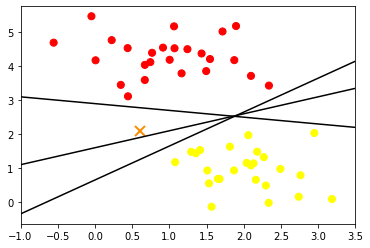

In [60]:
from sklearn.datasets import make_blobs

# Einfaches Beispiel mit eindeutig Unterteilten Clustern von Punkten
X, y = make_blobs(n_samples=50, centers=2, 
                 random_state=0, cluster_std=0.60)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

# >> mit einem linearen diskriminativen Modell könnte hier einfach eine Gerade zwischen den Punktclustern gezogen werden
# >> das PRoblem ist allerdings, dass es viele Möglichkeiten gibtm eine Gerade zu ziehen, die die Punkte perfekt trennt
xfit = np.linspace(-1, 3.5) # per default 50 Werte
plt.plot([0.6], [2.1], 'x', color='darkorange', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m*xfit +b, "-k")
plt.xlim(-1, 3.5)

# Diese drei Geraden trennen die Datenpunkte perfekt.
# >> Je nach gewählter Geraden, würde ein neuer Punkt (Kreuz) jedoch einem anderen Cluster zugeordnet werden
# >> Es braucht also mehr als Intuition, um die Punkte voneinander zu trennen

(-1.0, 3.5)

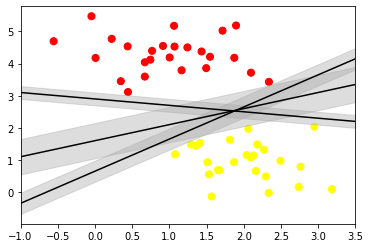

In [27]:
# SVM geht dieses Problem so an, dass jede Gerade um eine beidseitigen Margin verbreitert wird (wie ein Schatten in der 
# Breite vorstellen), der bis zu dem nächstgelegenen Punkt geht.
# >> SVM versucht nun die gerade zu finden, bei der der Margin am größten ist
# >> heißt, die am weitesten von dem nächsten Punkt entfernt ist >> 'genau in der Mitte liegt'

xfit = np.linspace(-1, 3.5) # per default 50 Werte
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m*xfit +b
    plt.plot(xfit, yfit, "-k")
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='None', color="#AAAAAA", alpha=0.4)
plt.xlim(-1, 3.5)

# in dem Fall hat die mittlere Linie den weiteresten Margin und wäre am besten geeignet (von visueller Interpretation)

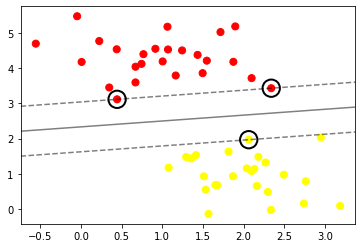

In [79]:
from sklearn.svm import SVC # Support Vector Classifier

# Erstellen der Klasse
model = SVC(kernel='linear', C=1E10)
# Berechnen des Modells
model.fit(X, y)

# Funktion zum Zeichnen der SVM-Lösung
def plot_svc_decision(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create a grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x) # Erstellt ein Gitter aus den Koordinaten der x/y-Achse 
    xy = np.vstack([X.ravel(), Y.ravel()]).T # .vstack konvertiert das Raster in eine lange Liste aus Punkten
    P = model.decision_function(xy).reshape(X.shape) # model.descision_function berechnet die Entscheidungsfunktion der SVM
    # (Trennlinie) anhand der Koordinaten (Abstand von jedem Punkt zur Trennline) + reshape passt diese an das aktuelle Koordinatensystem an
    
    # plot decision boundry and margins
    ax.contour(X, Y, P, colors='k',
              levels=[-1, 0, 1], alpha=0.5, # mit levels -1, 0, 1 wird festgelegt, dass die Entscheidungslinie mit Margen geplottet wird
              linestyles=["--", "-", "--"])
    
    # plot support vectors (Optionales Plotten der Punkte, die die Entscheidungsgrenzen darstellen)
    if plot_support:
        ax.scatter(model.support_vectors_[:,0],
                  model.support_vectors_[:,1],
                  s=300, linewidth=2, edgecolors='k', facecolor="None") # , groß, mit Grenze und innen leer
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision(model)
    

[[0.44359863 3.11530945]
 [2.33812285 3.43116792]
 [2.06156753 1.96918596]]
[-0.99969781 -1.00015041  0.999849  ]

Modellparameter
[ 0.23525694 -1.41250783] 3.2963415168371806


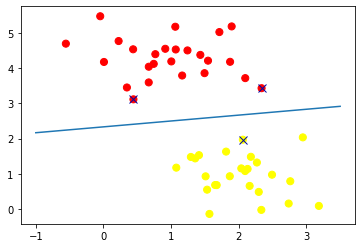

In [80]:
# ... eigene Arbeit zum Verständis
# Um die Punkte zu bekommen, die für die Entscheidung der Grenze essenziell sind kann folgendes Argument aufgerufen werden
print(model.support_vectors_)

# model.decision_function 
# ... berechnet den Abstand von Punkten zur Trennlinie (nimmt eine 2D Liste von Punkten [[X1, Y1], [X2, Y2] ...])
# z.B. mit Support_Vektoren (=Entscheidungsgrenzen))
print(model.decision_function(model.support_vectors_)) # Abstand zur Trennlinie ca. |1| >> Visualisierung der Konturen -1, 1

# Eigener Versuch der Visualisierung
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
# PLottet ein Kreuz auf die Punkte
for a, b in model.support_vectors_:
    plt.plot([a], [b], 'x', color='#000AAA', markeredgewidth=1, markersize=8)


# Parameter der Entscheidungsgrenze aus dem Modell auslesen
w = model.coef_[0]
b = model.intercept_[0]

print("\nModellparameter")
print(w, b)
entscheidungsgrenze = -(w[0] * xfit + b) / w[1] 
# ergibt sich aus der zugrundeliegenden Funktion: w0*x + w1*y +b = 0
# (Diese Funktion berechnet die Trennlinie in abhängigkeit von x und y mit zwei Gewichten w0 und w1)
# <=> -w1*y = w0x +b
# <=> y = -(w0 + b)/w1

plt.plot(xfit, entscheidungsgrenze)

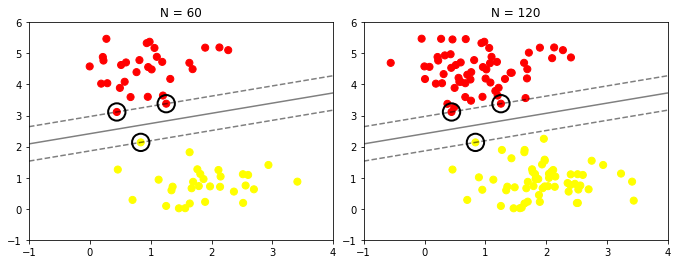

In [91]:
# Beispiel, um zu verdeutlichen, dass nur die Support Vektoren eine Bedeutung zum festlegen der Entscheidungsgrenze haben

def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2, 
                     random_state=0, cluster_std=0.6)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="autumn")
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision(model, ax)
    

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
fig.subplots_adjust(left=0.0625, right=.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

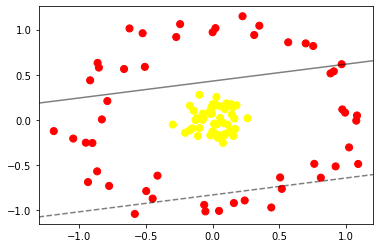

In [107]:
# X Beyond linear boundaries: Kernel SVM
# ... SVM wird besonders mätchig, wenn es mit kernels kombiniert wird (projektion von linearen Daten in höhere Dimensionen,
#     um komplexere Zusammenhänge darzustellen, e.g. bei Regression aus X, X² machen, um einen quadratischen Zusammenhang zu messen)

from sklearn.datasets import make_circles

# Erstellen von zwei CLustern, die zirkulär (Kreisförmig) voneinander getrennt sind...
X, y = make_circles(100, factor=.1, noise=.1)

# Berechnen einer linearen SVC-Lösung
clf = SVC(kernel="linear").fit(X, y)

# Visualisierung der Datenpunkte und der linearen Lösung
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="autumn")
plot_svc_decision(clf, plot_support=False)

# >> Schnell wird deutlich, dass die lineare Lösung nicht geeignet ist, um diese Form von Cluster zu trennen

# X Lösung:
# Projezieren der Daten in eine höhere Dimension, die sich mit einem linearen Ansatz erklären lässt
# z.B. über eine radial Basis Function, bei der die Punkte über den Abstand zu einem Mittelpunkt definiert werden
r = np.exp(-(X**2).sum(1))

SVC(C=1000000.0)

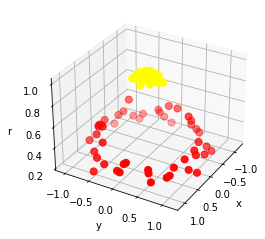

In [109]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter(X[:,0], X[:,1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
    
plot_3D()
# Dadurch wird deutlich, dass die Daten gut über eine lineare Ebene zwischen den geteilten Clustern getrennt werden können
# ... um so ein klares Ergebnis zu bekomen, muss die Radial Basis Function auf den richtigen Mittelpunkt gesetzt werden
# ... dabei entsteht das Problem, die geeignete Basis Funktion für den Algorithmus festzulegen
#  >> gelöst wird das ganze dadurch, indem jeder Datenpunkt als Mittelpunkt für die Basis Funktion gewählt wird und der 
#     Algorithmus durch die Ergebnisse siebt, um den besten Punkt für die Umwandlung zu finden
#  >> Dies wird Kernel Transformation genannt

# !!! Dieses Problem wird jedoch schnell sehr komplex, wenn mehr Dimensionen ins Spiel kommen
#  >> Eine Erleichterung schafft der kernel trick (siehe Buch-Link), der in svm von Python eingebaut ist

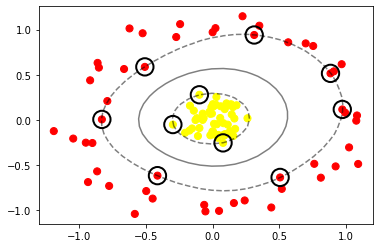

In [119]:
# X SVM mit RBF-Kernel (Radial Basis Function)
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')
plot_svc_decision(clf)

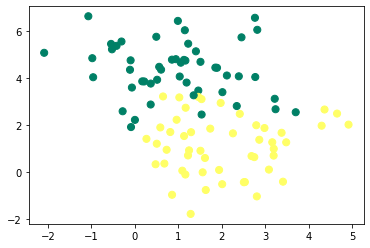

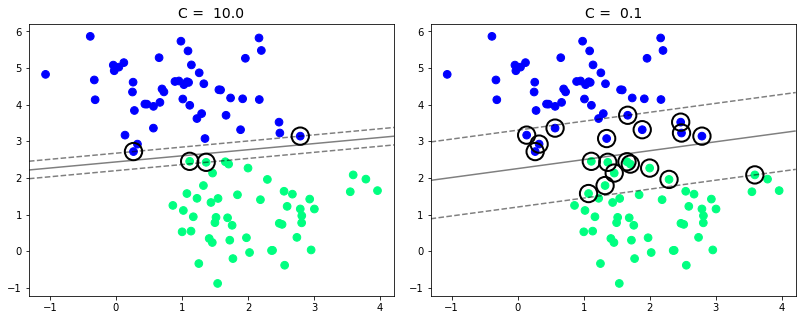

In [136]:
# X Tuning SVM - Margins 'weicher' machen (softening)
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='summer')
# >> Das Ergebnis zeigt, dass es keine klare Grenze gibt, um die beiden Cluster voneinander zu trennen

# Der Parameter C
# Um ein Problem wie dieses zu lösen, hat die SVM einen "Soft-Faktor", der es erlaubt, dass ein paar Punkte über die 
# Entscheidungsgrenze hinausgehen >> Dieser Parameter ist C
# >> Bei einem sehr großen C ist den Grenze hart
# >> Bei einem sehr kleinen C ist die Grenze weich

X, y = make_blobs(n_samples=100, centers=2,
                 random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(12,5))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X,y)
    axi.scatter(X[:,0], X[:,1], c=y, s=59, cmap='winter')
    plot_svc_decision(model, axi)
    axi.set_title('C = {0: .1f}'.format(C), size=14)

Run
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)
2914
2914


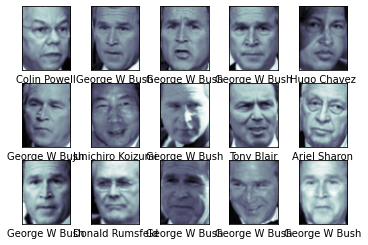

In [174]:
# X Anwendungsbeispiel SVM: Gesichtserkennung

from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

print("Run")
print(faces.target_names)
print(faces.images.shape)
# print(faces.target[0:10]) # Target enthält die target Codierung
# print(faces.target_names[faces.target[0:10]]) entspricht den dahinterliegenden Daten
# print(len(faces.data[0])) faces.data enthält 2914 Werte für die Pixel im Bild (= 62 X 42 Pixel)


fig, ax = plt.subplots(3, 5)
for i, ax in enumerate(ax.flat):
    ax.imshow(faces.images[i], cmap='bone')
    ax.set(xticks=[], yticks=[],
          xlabel=faces.target_names[faces.target[i]])

In [183]:
# Statt die Bilder jetzt wie im Zahlenbeispiel als eine Reihe von Pixeln mit einem gewissen Schwärzungsgrad auszulesen,
# werden mit PCA (Principal Component Analysis) zunächst 150 zentrale Komponenten gebildet und dann in den SVC gegeben

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

pca = PCA(n_components=150, svd_solver='randomized', whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

# Um den Classifier zu testen, wird der Datensatz in einen Test- und Trainingdatensatz unterteilt
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                               random_state=42)

# Nun wird via Crossvalidierung das beste Modell gesucht, um den Datensatz zu erklären
# Angepasst werden dafür C (für Margin Hardness) und Gamma (Kontrolliert die Größe des Radial Basis Function Kernels)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C':[1, 5, 10, 50],
             'svc__gamma':[0.0001, 0.0005, 0.001, 0.005]} # Wichtig! doppelter _
grid = GridSearchCV(model, param_grid)


%time grid.fit(Xtrain, ytrain)
print(grid.best_params_) # Die Parameter liegen in der Mitte des Grids, wenn sie an der Grenze sind, sollte der Grid erweitert werden

CPU times: total: 1min 16s
Wall time: 15.9 s
{'svc__C': 10, 'svc__gamma': 0.001}


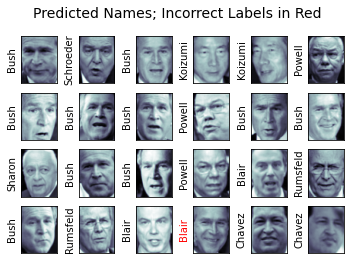

In [200]:
# Nun können die Label des Testdatensatzes vorhergesagt werden

model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                  color='black' if yfit[i] == ytest[i] else'red')
    fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)
    
# Die Grafik zeigt, dass der Algotihmus überwiegend richtig funktioniert

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337

Precision Sharon: 0.6470588235294118
Recall Sharon: 0.7333333333333333

X Confusion-Matrix
[[ 11   1   2   1   0   0   0   0]
 [  2  59   2   3   0   0   0   2]
 [  1   2  26   1   0   0   0   1]
 [  2  11   3 105   2   1   0   2]
 [  0   0   1   1  19   0   1   1]
 [  1   1   0   2   1  

Text(89.18, 0.5, 'Predicted Label')

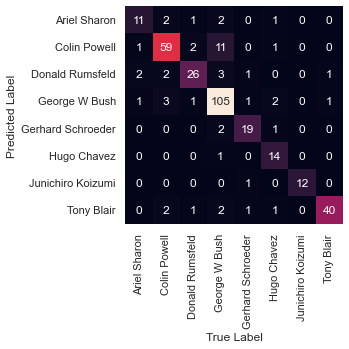

In [227]:
# Einen besseren Eindruck erhält man jedoch über den CLassification Report
from sklearn.metrics import classification_report

print(classification_report(ytest, yfit, # y_true, y_predicted
                           target_names=faces.target_names)) # bestimmt einfach nur Namensvektor

# X Erklärung der Report-Werte aus der Confusion-Matrix
# Precision: Wie viel der Vorhergesagten positive tatsächlich Positive ist
# >> von den Ariel Sharon vorhersagen sind 65% tatsächlich Ariel Sharon
print("Precision Sharon:", 11/17)

# Recall: Gibt an wie viele der positives Erkannt wurden
# >> von den als Ariel Sharon klassifizierten Bilder wurden 73% richtig erkannt
print("Recall Sharon:", 11/15)

# f1-score: Harmonisches Mittel aus Recall und Precision

# support: Absolute Häufigkeit im Datensatz (lame)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)

print("\nX Confusion-Matrix")
print(mat)

print("\n\nX Heatmap der Confusion-Matrix")
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')


# Dieses Beispiel unterscheidet sich dahingehend von echten Gesichterkennungsprogrammen, dass die Bilder häufig nicht
# in bereits zugeschnittenen Formaten kommen 
# ... diese müssten erst mit einem komplexeren Algorithmus identifiziert werden
# ... außerdem müssten feature gefunden werden, die unabhängig von der Pixelfärbung sind
#  >> eine gute Anwendung dafür ist OpenCV, das unter anderem feature extraction für Bilder und Gesichter enthält



# Vorteile der SVM
# - Fokus auf wenige Support Vektors bedeutet, dass wenig Speicher benötigt wird
# - Nachdem das Modell trainiert wurde, ist die Vorhersage schnell möglich
# - Funktioniert gut mit high-dimensional Data
# - Die Integration von Kernel Methoden, macht sie sehr flexibel, auch für komplexere Zusammenhänge

# Nachteile von SVM
# - Der Aufwand der Berechung steigt mit der Anzahl der Trainingsdaten (ca. N³ im worst case, bei effizienter Anwendung um 
#   N²), was die Methode bei großen Datensätzen unpraktisch macht
# - Die Ergebnisse hängen stark von der richtigen Wahl des softening parameters C ab, der über Crossvalidierung bestimmt werden sollte
# - Die Ergebnisse haben keine direkte probabilistische Interpretation
#   > diese kann jedoch geschätzt werden (siehe probability parameter vpn SVC) >> was aber Zeitintensiv sein kann
